### This project is about customer churn prediction. 
* Churn quantifies the number of customers unsubscribing/canceling the service.In this project, we would like to build a model which can help us identify the intention of customers to leave us in future. 

* To solve the problem of predicting customer churn, we will analyze the past data to study the characteristics/behaviour of the customers before they churned.

* The dataset we will be using is Telcom Customer Churn Dataset from kaggle (https://www.kaggle.com/blastchar/telco-customer-churn)

### Lets start the Exploratory Data Analysis

In [3]:
# Import the dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

About the data:
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
* The raw data contains 7043 rows (customers) and 21 columns (features).
* The “Churn” column is our target.

The columns are as follows:
* customerID - Customer ID
* gender - Whether the customer is a male or a female
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner - Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract - The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - The amount charged to the customer monthly
* TotalCharges - The total amount charged to the customer
* Churn - Whether the customer churned or not (Yes or No)

In [7]:
# Loading the data in pandas
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
print('Percentage of churned customers: ', round(((1869 / (5174+1869)) *100),2))

Percentage of churned customers:  26.54


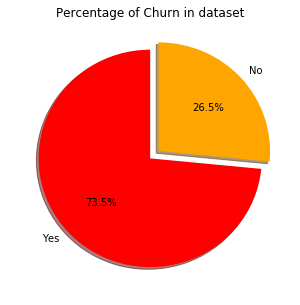

In [34]:
# lets visualize it with a pie chart
data_size = df.Churn.value_counts(sort=True)
colors = ['red','orange']
rcParams['figure.figsize'] = 5,5

# For plotting
labels = 'Yes', 'No'
explode = (0, 0.1) 
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of Churn in dataset')
plt.show()

Next step is data preprocessing and feature engineering